# Task 2 : Uber Data analysis

### Description:
#### Uber Data Analysis involves studying data related to Uber rides, such as ride times, locations, and user ratings. The analysis can be used to understand user behavior, driver patterns, and areas of high demand.

#### Python with libraries like Pandas, Matplotlib, and Seaborn is commonly used for this type of analysis.

#  Importing required libraries:


In [1]:

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import plotly.express as px

## Importing data

In [2]:
df=pd.read_csv(r"C:\Users\ANAND\Downloads\Alfido Tech\UberDataset.csv")

In [3]:
df.head()

START_DATE          END_DATE  CATEGORY        START             STOP  \
0  01-01-2016 21:11  01-01-2016 21:17  Business  Fort Pierce      Fort Pierce   
1  01-02-2016 01:25  01-02-2016 01:37  Business  Fort Pierce      Fort Pierce   
2  01-02-2016 20:25  01-02-2016 20:38  Business  Fort Pierce      Fort Pierce   
3  01-05-2016 17:31  01-05-2016 17:45  Business  Fort Pierce      Fort Pierce   
4  01-06-2016 14:42  01-06-2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES          PURPOSE  
0    5.1   Meal/Entertain  
1    5.0              NaN  
2    4.8  Errand/Supplies  
3    4.7          Meeting  
4   63.7   Customer Visit

# 1.Data Exploration:

### Shape of dataset

In [4]:
df.shape

(1156, 7)

### Columns names

In [5]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

### All information about Dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


### Statistical information about all numerical columns

In [7]:
df.describe()

MILES
count   1156.000000
mean      21.115398
std      359.299007
min        0.500000
25%        2.900000
50%        6.000000
75%       10.400000
max    12204.700000

# 2.Data Cleaning:

### Checking for Duplicates

In [8]:
df.duplicated().sum()

1

In [9]:
# Delete the duplicate:

df.drop_duplicates(inplace = True)

In [10]:
df.duplicated().sum()

0

### Noise Values

In [11]:
for i in df:
    print(i,df[i].sort_values().unique(),'\n')

START_DATE ['01-01-2016 21:11' '01-02-2016 01:25' '01-02-2016 20:25' ...
 '9/30/2016 17:39' '9/30/2016 20:59' 'Totals'] 

END_DATE ['01-01-2016 21:17' '01-02-2016 01:37' '01-02-2016 20:38' ...
 '9/30/2016 20:20' '9/30/2016 22:34' nan] 

CATEGORY ['Business' 'Personal' nan] 

START ['Agnew' 'Almond' 'Apex' 'Arabi' 'Arlington' 'Arlington Park at Amberly'
 'Asheville' 'Austin' 'Banner Elk' 'Bellevue' 'Berkeley' 'Boone'
 'Briar Meadow' 'Bryson City' 'Burtrose' 'CBD' 'Capitol One' 'Cary'
 'Central' 'Chalmette' 'Chapel Hill' 'Chessington' 'College Avenue'
 'Colombo' 'Columbia Heights' 'Congress Ave District' 'Connecticut Avenue'
 'Convention Center District' 'Cory' 'Couples Glen' 'Covington' 'Coxville'
 'Daytona Beach' 'Downtown' 'Durham' 'Eagan Park' 'Eagle Rock'
 'East Austin' 'East Elmhurst' 'East Harlem' 'Eastgate' 'Edgehill Farms'
 'El Cerrito' 'Elk Park' 'Elmhurst' 'Emeryville' 'Fairmont'
 'Farmington Woods' 'Fayetteville Street' 'Financial District'
 'Flatiron District' 'Florence' 'Fo

#### There is a Noise Value present in Start_Date column.

In [12]:
df=df.drop(df[df['START_DATE']=='Totals'].index)

In [40]:
#I've noticed the word Karachi and Rawalpindi is not spelled correctly 
# Replace "Kar?chi" with "Karachi" in 'START' and 'STOP' columns
# Replace "R?walpindi" with "Rawalpindi" in 'START' and 'STOP' columns

df['START'] = df['START'].replace("Kar?chi", "Karachi")
df['STOP'] = df['STOP'].replace("Kar?chi", "Karachi")
df['START'] = df['START'].replace("R?walpindi", "Rawalpindi")
df['STOP'] = df['STOP'].replace("R?walpindi", "Rawalpindi")

### Null values

In [14]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [15]:
df['PURPOSE'].fillna('Unknown',inplace=True)

In [16]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [17]:
df.shape

(1154, 7)

### Datatype of each Columns

In [18]:
df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

### Convert the 'START_DATE' and 'END_DATE' columns to datetime with 'coerce'

In [19]:

df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')


In [20]:
df.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

# 3. Data Visualization:

### Most Common Purposes for Uber Trips

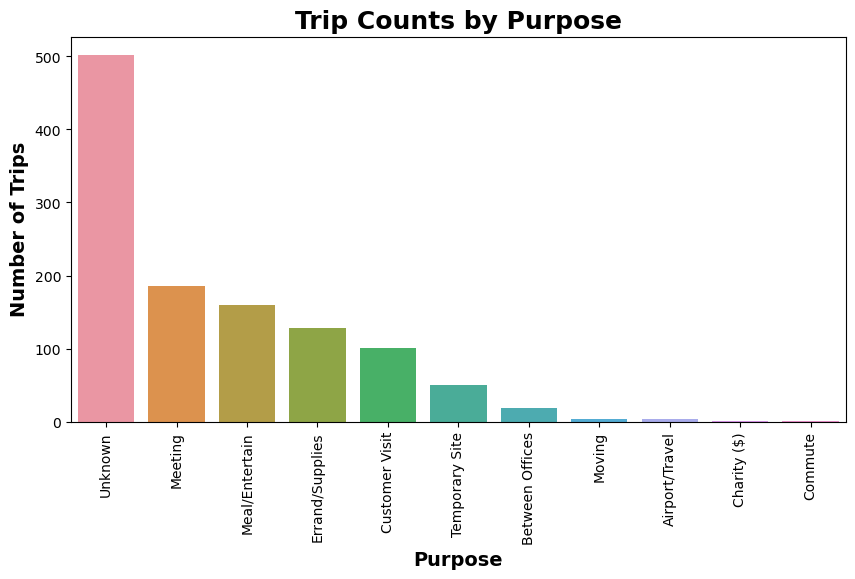

In [21]:
# Trip counts by purpose
purpose_counts = df['PURPOSE'].value_counts()

# Plot purpose distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=purpose_counts.index, y=purpose_counts.values)
plt.title('Trip Counts by Purpose',color='Black',fontweight='bold',fontsize=18)
plt.xlabel('Purpose',color='Black',fontweight='bold',fontsize=14)
plt.ylabel('Number of Trips',color='Black',fontweight='bold',fontsize=14)
plt.xticks(rotation=90)
plt.show()

### Distribution of Trips Across Time Slots

In [22]:
df['Request Hour'] = df['START_DATE'].dt.hour

In [23]:
TIME_SLOTS = {
    0: 'Late Night',
    1: 'Midnight',
    2: 'Midnight',
    3: 'Early Morning',
    4: 'Early Morning',
    5: 'Early Morning',
    6: 'Morning',
    7: 'Morning',
    8: 'Morning',
    9: 'Morning',
    10: 'Morning',
    11: 'Morning',
    12: 'After Noon',
    13: 'After Noon',
    14: 'After Noon',
    15: 'After Noon',
    16: 'Evening',
    17: 'Evening',
    18: 'Evening',
    19: 'Night',
    20: 'Night',
    21: 'Night',
    22: 'Late Night',
    23: 'Late Night',
}
df['Time Slot'] = df['Request Hour'].apply(lambda x: TIME_SLOTS.get(x))

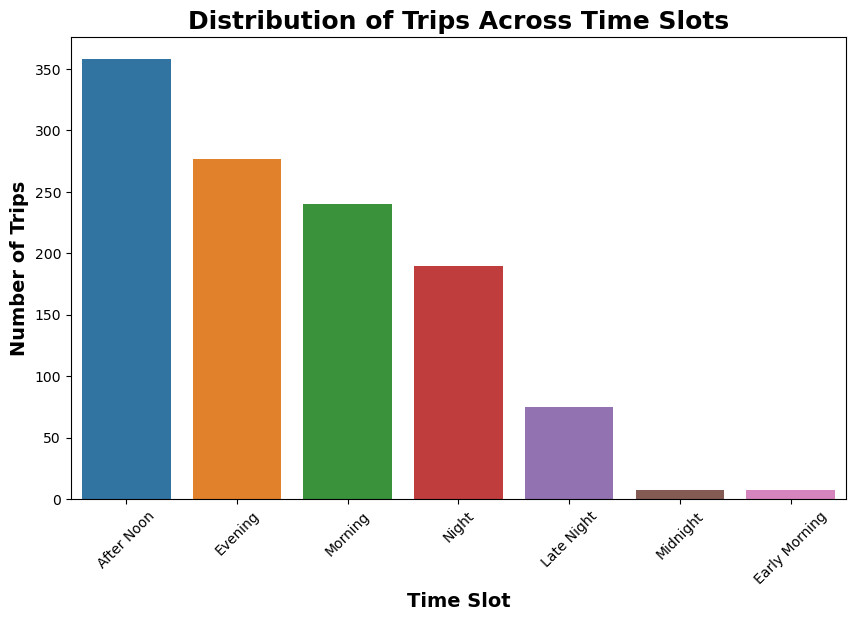

In [24]:
time_slot_counts = df['Time Slot'].value_counts()

# Visualization: Distribution of Trips in Different Time Slots
plt.figure(figsize=(10, 6))
sns.barplot(x=time_slot_counts.index, y=time_slot_counts.values)
plt.title('Distribution of Trips Across Time Slots',color='Black',fontweight='bold',fontsize=18)
plt.xlabel('Time Slot',color='Black',fontweight='bold',fontsize=14)
plt.ylabel('Number of Trips',color='Black',fontweight='bold',fontsize=14)
plt.xticks(rotation=45)
plt.show()

###  Average Miles for Purposes

In [25]:
average_miles_by_purpose = df.groupby('PURPOSE')['MILES'].mean()
average_miles_by_purpose

PURPOSE
Airport/Travel       5.500000
Between Offices     10.944444
Charity ($)         15.100000
Commute            180.200000
Customer Visit      20.688119
Errand/Supplies      3.968750
Meal/Entertain       5.698125
Meeting             15.276344
Moving               4.550000
Temporary Site      10.474000
Unknown              9.748008
Name: MILES, dtype: float64

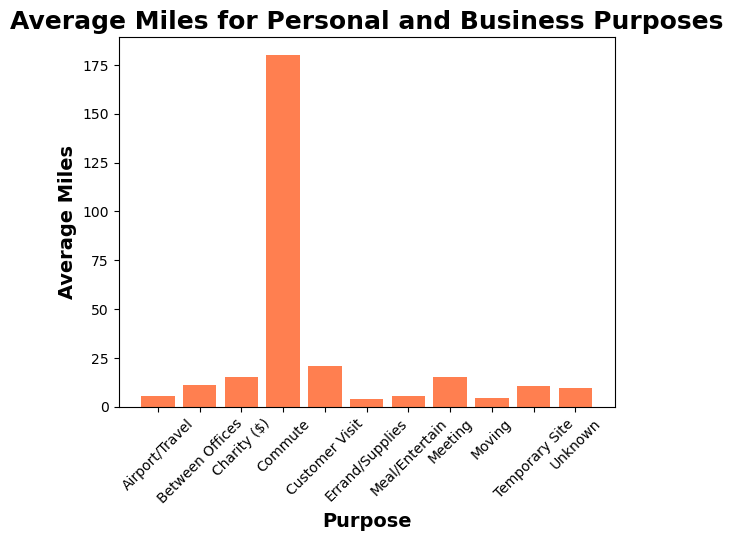

In [26]:
# Plotting the bar chart

plt.bar(average_miles_by_purpose.index, average_miles_by_purpose.values , color='coral')
plt.xlabel('Purpose',color='Black',fontweight='bold',fontsize=14)
plt.ylabel('Average Miles',color='Black',fontweight='bold',fontsize=14)
plt.title('Average Miles for Personal and Business Purposes',color='Black',fontweight='bold',fontsize=18)
plt.xticks(rotation=45)
plt.show()

###  Average Miles for Category

In [27]:
# Plotting the bar chart

average_miles_by_cat = df.groupby('CATEGORY')['MILES'].mean()
average_miles_by_cat

CATEGORY
Business    10.656546
Personal     9.320779
Name: MILES, dtype: float64

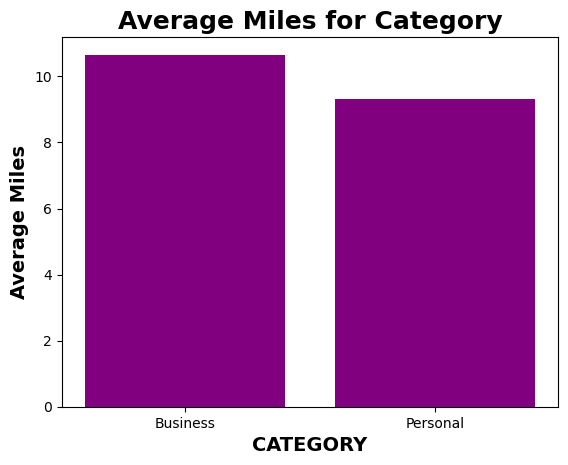

In [28]:
plt.bar(average_miles_by_cat.index, average_miles_by_cat.values , color='purple')
plt.xlabel('CATEGORY',color='Black',fontweight='bold',fontsize=14)
plt.ylabel('Average Miles',color='Black',fontweight='bold',fontsize=14)
plt.title('Average Miles for Category',color='Black',fontweight='bold',fontsize=18)
plt.show()

###  The Most Order Uber Category

In [29]:
mostUsed_category = df['CATEGORY'].value_counts(normalize=True).reset_index(name='Proportion')

fig = px.pie(data_frame=mostUsed_category, names ='index', values='Proportion', 
             title='The Most Order Uber Category')

fig.show()

### Stations performence

In [30]:
# Get the top 10 start stations
top_10_start_stations = df['START'].value_counts().nlargest(10)

# Get the top 10 stop stations
top_10_stop_stations = df['STOP'].value_counts().nlargest(10)

print("Top 10 Start Stations:")
print(top_10_start_stations)

print("\nTop 10 Stop Stations:")
print(top_10_stop_stations)

Top 10 Start Stations:
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Lahore               36
Durham               36
Karachi              31
Raleigh              28
Apex                 17
Name: START, dtype: int64

Top 10 Stop Stations:
Cary                202
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Lahore               36
Durham               36
Raleigh              29
Karachi              28
Rawalpindi           18
Name: STOP, dtype: int64


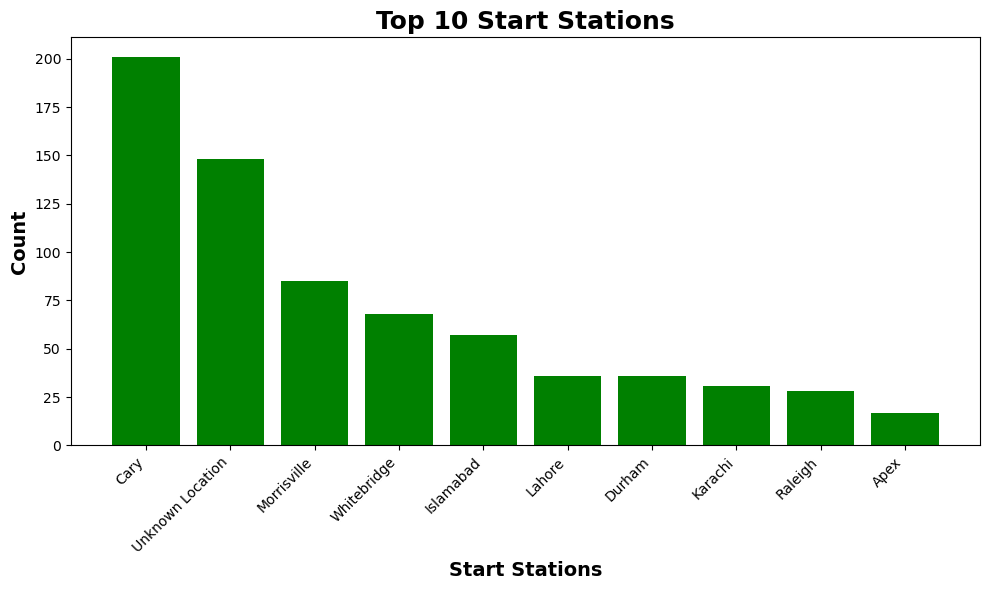

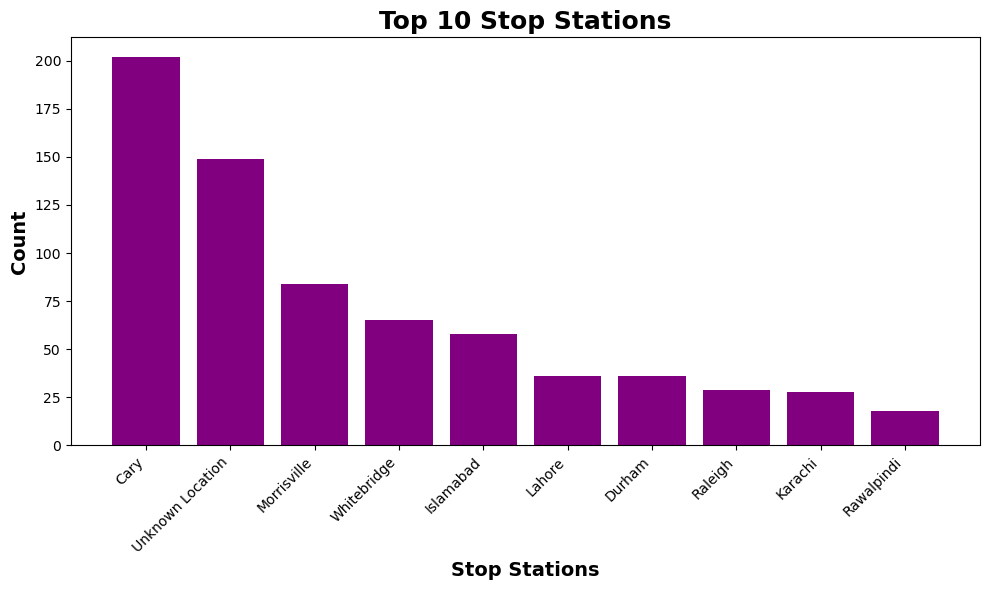

In [31]:
# Plotting the top 10 start stations
plt.figure(figsize=(10, 6))
plt.bar(top_10_start_stations.index, top_10_start_stations.values  , color='green')
plt.xlabel('Start Stations',color='Black',fontweight='bold',fontsize=14)
plt.ylabel('Count',color='Black',fontweight='bold',fontsize=14)
plt.title('Top 10 Start Stations',color='Black',fontweight='bold',fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting the top 10 stop stations
plt.figure(figsize=(10, 6))
plt.bar(top_10_stop_stations.index, top_10_stop_stations.values , color='purple')
plt.xlabel('Stop Stations',color='Black',fontweight='bold',fontsize=14)
plt.ylabel('Count',color='Black',fontweight='bold',fontsize=14)
plt.title('Top 10 Stop Stations',color='Black',fontweight='bold',fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###  Scatter Plot of Time of Day vs. Miles Traveled:

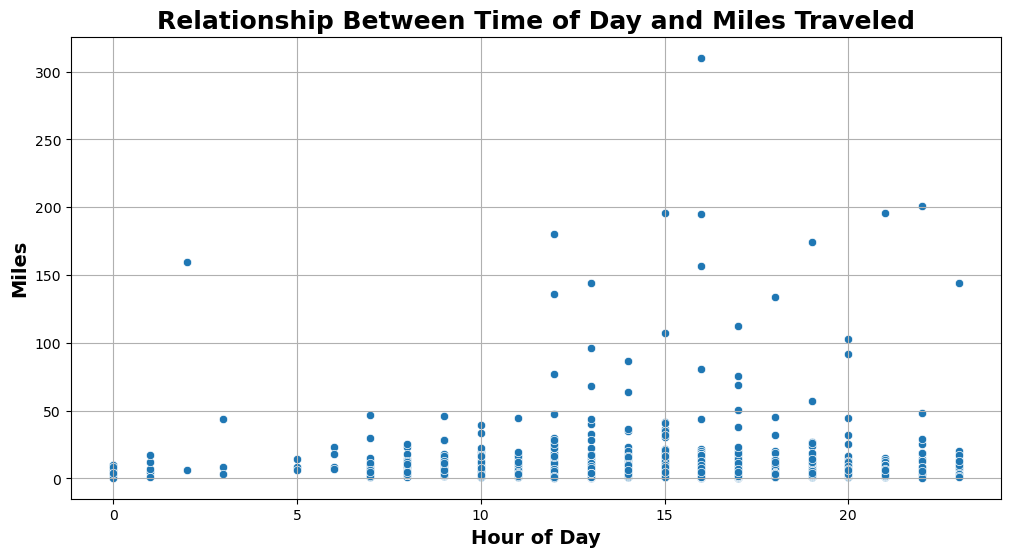

In [32]:
df['Hour_of_Day'] = df['START_DATE'].dt.hour
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Hour_of_Day', y='MILES')
plt.title('Relationship Between Time of Day and Miles Traveled',color='Black',fontweight='bold',fontsize=18)
plt.xlabel('Hour of Day',color='Black',fontweight='bold',fontsize=14)
plt.ylabel('Miles',color='Black',fontweight='bold',fontsize=14)
plt.grid(True)
plt.show()

### Histogram of Uber Trip Durations

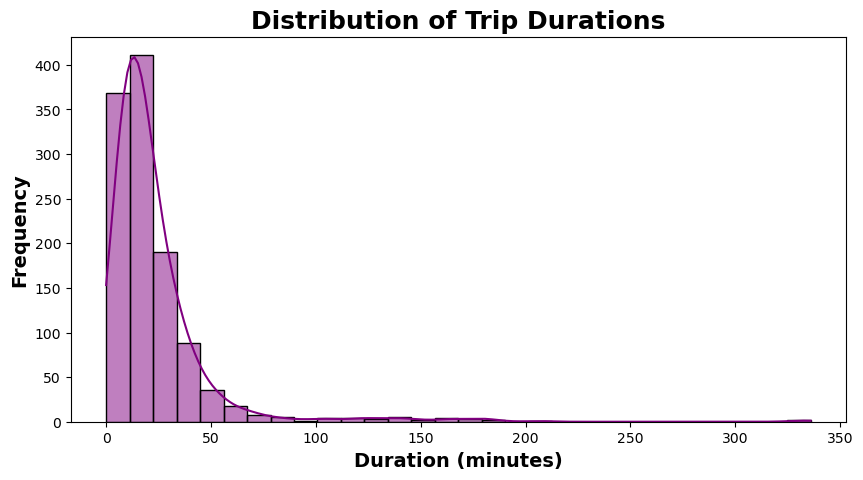

In [33]:
df['DURATION'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60

# Plot distribution of trip durations
plt.figure(figsize=(10, 5))
sns.histplot(df['DURATION'], bins=30,color='purple', kde=True)
plt.title('Distribution of Trip Durations',color='Black',fontweight='bold',fontsize=18)
plt.xlabel('Duration (minutes)',color='Black',fontweight='bold',fontsize=14)
plt.ylabel('Frequency',color='Black',fontweight='bold',fontsize=14)
plt.show()

### Travel purpose user behaviors

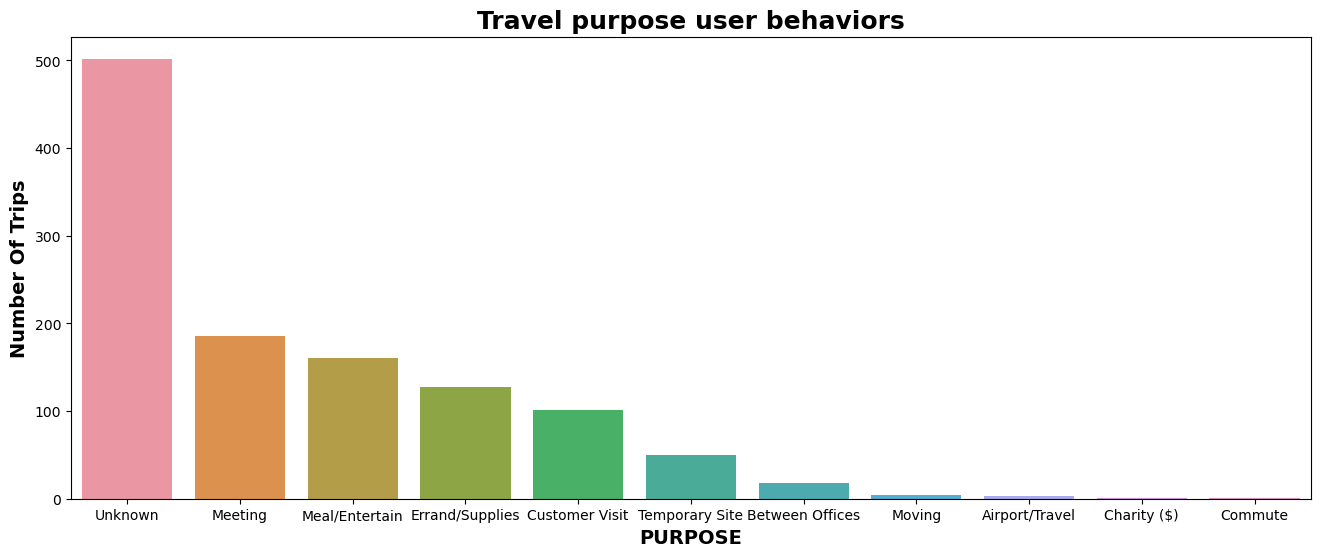

In [34]:
plt.figure(figsize=(16, 6))
sns.countplot(x='PURPOSE', data=df, order=df['PURPOSE'].value_counts().index)
plt.xlabel('PURPOSE',color='Black',fontweight='bold',fontsize=14)
plt.ylabel('Number Of Trips',color='Black',fontweight='bold',fontsize=14)
plt.title('Travel purpose user behaviors',color='Black',fontweight='bold',fontsize=18)
plt.show()


#### Throughout 2016, ~93% of the customers used Uber for Business occasions, compared to only ~7% who used it for Personal use.

#### The top 3 purpose for our customers to order Uber is Meeting, Meal/Entertain, and Errand/Supplies, all of which lies in the category of Business.

#### If from the very first start, the company does prioritize targeting business people, this result wouldn't be so much of a concern. However, if the company also indeed target Personal use customer, this result is concerning and thus needs to be investigated more.

## How is the daily trend for Uber trips?

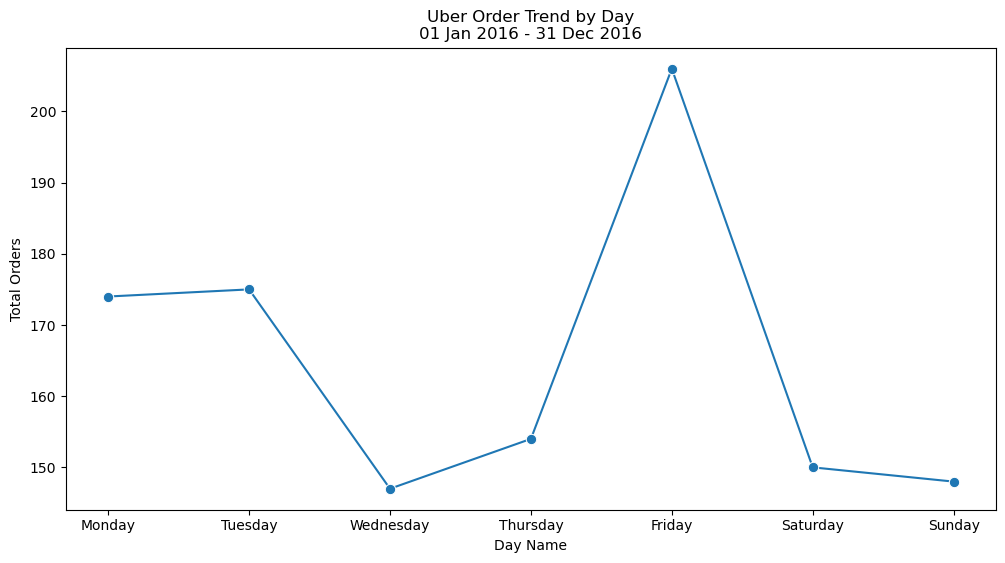

In [35]:
# Copying dataframe
daily_trend = df.copy()

# Creating column dayname
daily_trend['DAYNAME'] = daily_trend['START_DATE'].apply(lambda x: x.strftime('%A'))

# Counting orders per dayname
daily_trend = daily_trend.groupby(['DAYNAME']).size()

# Creating day name order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Creating figure and axes object
fig, ax = plt.subplots(figsize=(12,6))

# Plotting
sns.lineplot(
    x = daily_trend.loc[day_order].index,
    y = daily_trend.loc[day_order].values,
    ax = ax,
    marker = '.',
    markersize = 15
)

# Customizing
ax.set_title('Uber Order Trend by Day\n01 Jan 2016 - 31 Dec 2016')
ax.set_xlabel('Day Name')
ax.set_ylabel('Total Orders')

plt.show()

#### Surprisingly, orders are less likely to occur on Wednesdays than on weekend days.

#### Orders are skyrocketing on Friday.

#### Low orders on the weekend can be associated with the customer segment proportion which implies ~93% of customers are ordering Uber for business purposes.

## How is the monthly trend for Uber trips?

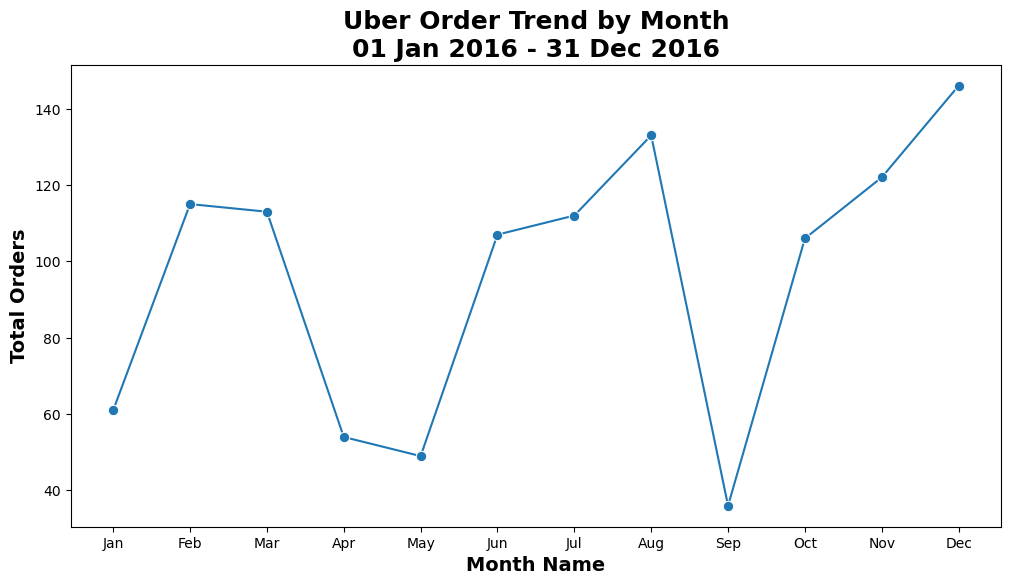

In [36]:


# Assuming df is your DataFrame
monthly_trend = df.copy()

# Creating column month
monthly_trend['MONTH'] = monthly_trend['START_DATE'].apply(lambda x: x.strftime('%b'))

# Counting orders per month
monthly_trend_counts = monthly_trend.groupby(['MONTH']).size()

# Creating month name order
month_order = [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
]

# Reordering the index according to month_order
monthly_trend_counts = monthly_trend_counts.reindex(month_order, fill_value=0)

# Creating figure and axes object
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting
sns.lineplot(
    x=monthly_trend_counts.index,
    y=monthly_trend_counts.values,
    ax=ax,
    marker='.',
    markersize=15
)

ax.set_title('Uber Order Trend by Month\n01 Jan 2016 - 31 Dec 2016',color='Black',fontweight='bold',fontsize=18)
ax.set_xlabel('Month Name',color='Black',fontweight='bold',fontsize=14)
ax.set_ylabel('Total Orders',color='Black',fontweight='bold',fontsize=14)

plt.show()


#### The orders are increasing and considered in the relatively high amount in Q1.

#### The orders are declining at the beginning of Q2 but increase at the end of the quarter.

#### In Q3, it increased at the beginning of the quarter, however, it declined steeply at the end of the quarter.

#### And the order experienced a good increasing trend in the last quarter (Q4).



## How is the hourly trend for Uber trips?

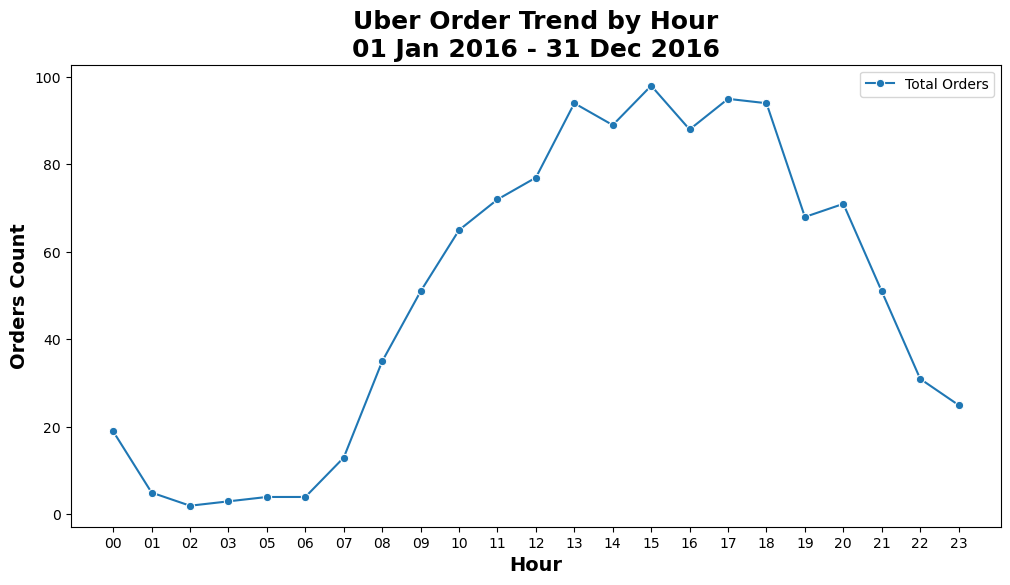

In [37]:
# Copy dataset
hourly_data = df.copy()


# Crete hour column
hourly_data['HOUR'] = hourly_data['START_DATE'].apply(lambda x: x.strftime('%H'))

# Counting data in each column
hourly_data_count = hourly_data.groupby(['HOUR']).size().reset_index(name='COUNT')

# Plotting trend

# Creating figure and axes object
fig, ax = plt.subplots(figsize=(12,6))

# Ploting
sns.lineplot(
    data = hourly_data_count,
    x = 'HOUR',
    y = 'COUNT',
    ax = ax,
    label = 'Total Orders',
    marker = '.',
    markersize = 12
)

# Customizing
ax.set_title('Uber Order Trend by Hour\n01 Jan 2016 - 31 Dec 2016',color='Black',fontweight='bold',fontsize=18)
ax.set_ylabel('Orders Count',color='Black',fontweight='bold',fontsize=14)
ax.set_xlabel('Hour',color='Black',fontweight='bold',fontsize=14)

plt.show()

#### The orders start to increase at 6 a.m.

#### There are a relatively high amount of orders starting from 1 pm to 6 pm.

#### Apparently, there was no Uber order made at the time interval 4 a.m. - 5 a.m. in 2016.

In [38]:
df.head()

START_DATE            END_DATE  CATEGORY        START  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business  Fort Pierce   
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business  Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business  Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business  Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business  Fort Pierce   

              STOP  MILES          PURPOSE  Request Hour   Time Slot  \
0      Fort Pierce    5.1   Meal/Entertain            21       Night   
1      Fort Pierce    5.0          Unknown             1    Midnight   
2      Fort Pierce    4.8  Errand/Supplies            20       Night   
3      Fort Pierce    4.7          Meeting            17     Evening   
4  West Palm Beach   63.7   Customer Visit            14  After Noon   

   Hour_of_Day  DURATION  
0           21       6.0  
1            1      12.0  
2           20      13.0  
3           17      14.0  
4           14      67.0

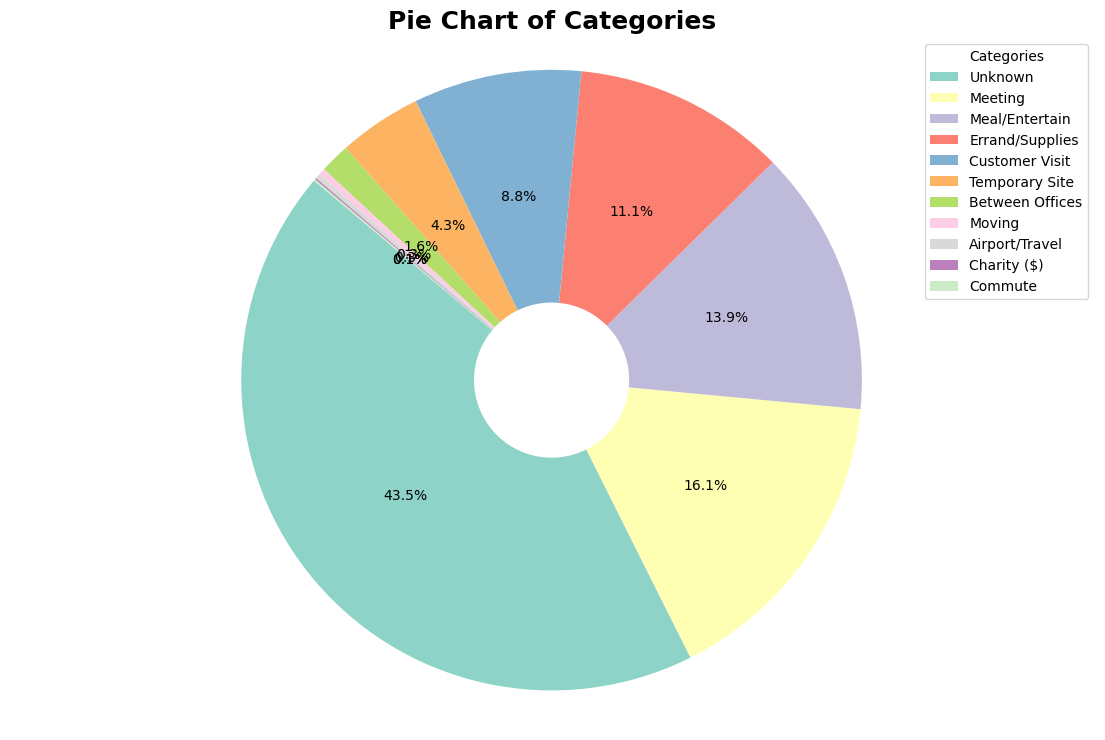

In [39]:
# Count the occurrences of each category
category_counts = df['PURPOSE'].value_counts()

# Data for the pie chart
sizes = category_counts.values
labels = category_counts.index
colors = plt.cm.Set3.colors  # Choose a colormap

# Create a pie chart
plt.figure(figsize=(14,9))
plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Adding white circle in the center to make it look like a donut chart (optional)
centre_circle = plt.Circle((0,0),0.25,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.legend(labels, title='Categories', loc='best')
plt.title('Pie Chart of Categories',color='Black',fontweight='bold',fontsize=18)
plt.show()

# *THANKS*